In [38]:
import pandas as pd
import math
import numpy as np
import collections
import matplotlib.pyplot as plt
import gensim
from gensim.utils import simple_preprocess
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import pyLDAvis
import pyLDAvis.sklearn
import gensim.corpora as corpora
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from pprint import pprint
from gensim.models import CoherenceModel
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
import helper_functions
%matplotlib inline
import en_core_web_sm
nlp = en_core_web_sm.load()

In [2]:
pd.options.mode.chained_assignment = None  # default='warn'


# 1) Import cleaned CSV.

In [3]:
df = pd.read_csv('lab_grown_date_df.csv')

# 2) Preprocess and generate inputs for LDA model.
Use prepare_for_LDA in helper_functions.py.

In [4]:
# Prepare LDA with prepare_for_LDA function
l_id2word, l_texts, l_corpus = helper_functions.prepare_for_LDA(df, 'lemm')

# 3) Feed data into LDA model.

In [36]:
# Build LDA model
lda9_model = gensim.models.LdaMulticore(corpus=l_corpus,
                                       id2word=l_id2word,
                                       num_topics=8, 
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)

# 4) Get topic coherence score and topic keywords. 
Use get_topics_coherence function from helper_functions.py.

In [37]:
helper_functions.get_topics_coherence(lda9_model, l_corpus, l_texts, l_id2word)

[(0,
  '0.087*"\'meat\'," + 0.025*"\'lab\'," + 0.025*"\'like\'," + 0.023*"\'I\'," + '
  '0.021*"\'grown\'," + 0.020*"\'would\'," + 0.019*"\'taste\'," + '
  '0.018*"\'burger\'," + 0.018*"\'eat\'," + 0.011*"\'real\',"'),
 (1,
  '0.015*"\'bean\'," + 0.015*"[\'yes\'," + 0.013*"[\'like\'," + '
  '0.011*"\'dollar\'," + 0.011*"[\'good\'," + 0.011*"\'right\']" + '
  '0.009*"[\'get\'," + 0.009*"[\'sure\'," + 0.009*"[\'need\'," + '
  '0.008*"[\'sound\',"'),
 (2,
  '0.012*"\'food\'," + 0.010*"\'year\'," + 0.009*"\'make\'," + '
  '0.009*"\'like\'," + 0.008*"\'get\'," + 0.008*"\'time\'," + 0.008*"\'one\'," '
  '+ 0.007*"\'would\'," + 0.007*"\'beef\'," + 0.007*"\'people\',"'),
 (3,
  '0.041*"[]" + 0.022*"\'diet\'," + 0.017*"\'org\'," + 0.012*"\'vegan\'," + '
  '0.008*"\'study\'," + 0.008*"\'r\'," + 0.008*"\'gov\'," + '
  '0.008*"\'health\'," + 0.008*"\'source\'," + 0.007*"\'en\',"'),
 (4,
  '0.017*"\'water\'," + 0.015*"\'land\'," + 0.009*"\'suffering\'," + '
  '0.008*"\'agriculture\'," + 0.008*"\'fa

The coherence score looks at whether the topics keywords "make sense" when put together.

# 5) Append dominant topic to dataframe.
Append data generated from model, such as the dominant topic and percent contributions to the original dataframe. Use get_topic_df from helper_functions.py.

In [8]:
l_topic_df = helper_functions.get_topic_df(df, lda9_model, l_corpus, l_texts)

# 6) Analyze topics by sentiment and wordclouds

The sentiment score for this topic is 0.1539.


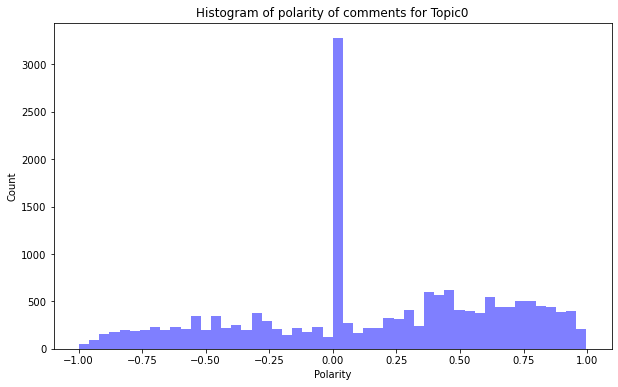

-------------------------------------------------
The sentiment score for this topic is 0.0427.


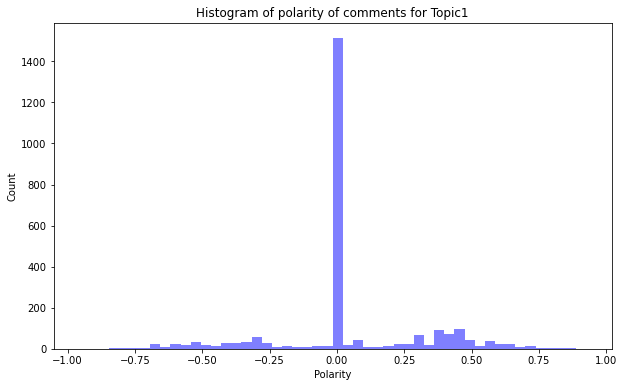

-------------------------------------------------
The sentiment score for this topic is 0.1414.


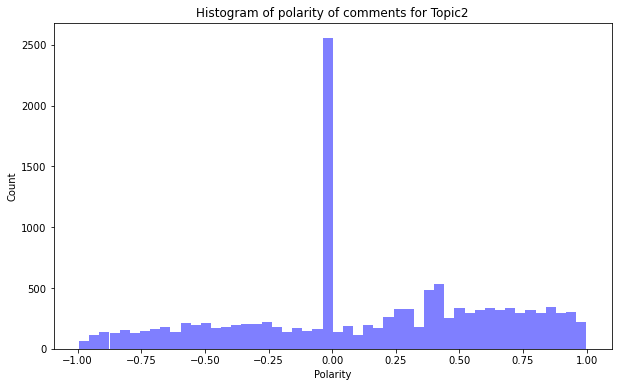

-------------------------------------------------
The sentiment score for this topic is 0.0183.


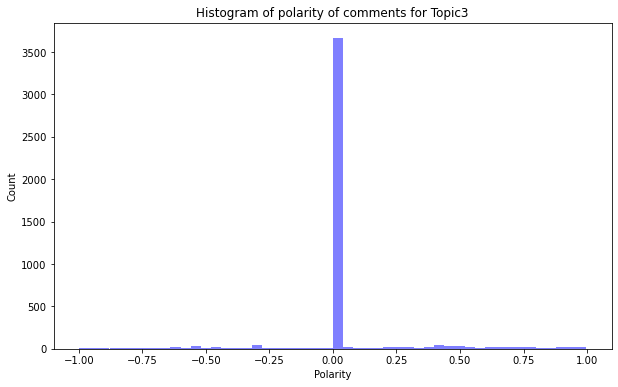

-------------------------------------------------
The sentiment score for this topic is 0.0116.


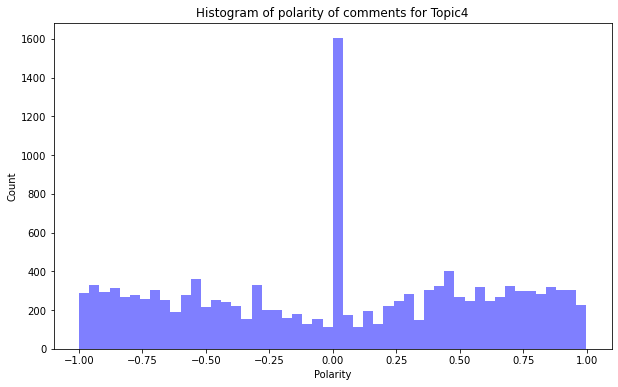

-------------------------------------------------
The sentiment score for this topic is 0.1425.


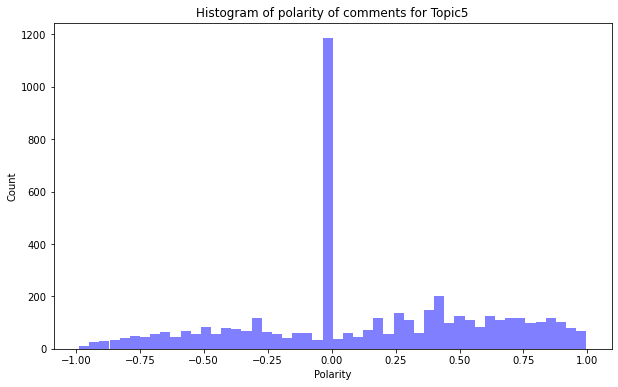

-------------------------------------------------
The sentiment score for this topic is 0.0936.


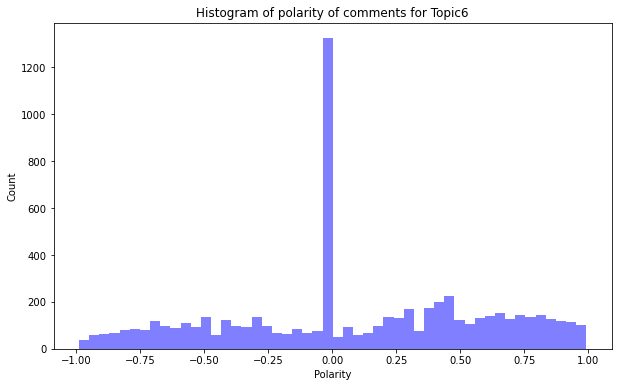

-------------------------------------------------
The sentiment score for this topic is 0.0135.


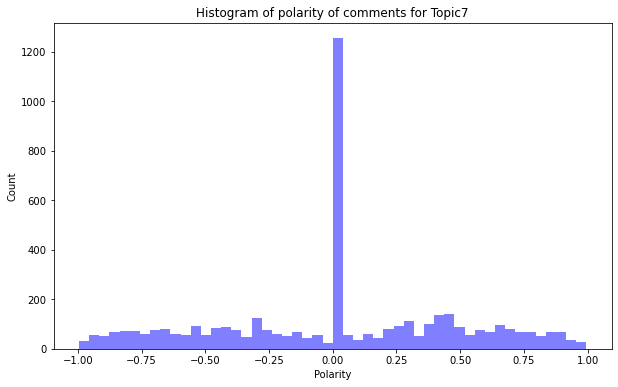

-------------------------------------------------
The sentiment score for this topic is 0.1864.


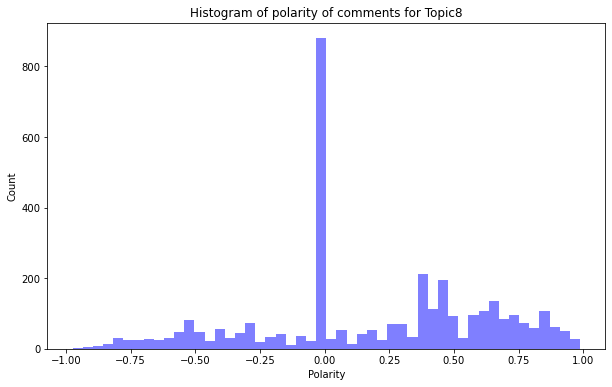

-------------------------------------------------


In [17]:
helper_functions.get_sentiment_distribution(l_topic_df, 'lab')

The overall distribution of sentiment for each of the topics were fairly neutral. 
It seems that there are very positive comments as well as very negative comments so the sentiment seems to be balanced out.
The topics were decided by looking at the wordclouds and topic keywords.

## Get an idea of the distribution of comments in each topic.

In [20]:
sid = SentimentIntensityAnalyzer()
l_topic_df['vader'] = l_topic_df['comment'].apply(lambda comment:sid.polarity_scores(comment))
l_topic_df['compound'] = l_topic_df['vader'].apply(lambda score_dict: score_dict['compound'])

In [73]:
#make a dictionary containing the counts of the comments
counts_dict = df['Dominant_Topic'].value_counts().to_dict()
counts_dict = collections.OrderedDict(sorted(counts_dict.items()))


In [68]:
#make a dictionary containing the counts of the comments in each topic.
pos_comment_list = []
topic_list = []
for i in range(int(max(df['Dominant_Topic'])+1)):
    count = 0
    top_1 = df[df['Dominant_Topic'] == i]
    pos_1 = top_1[top_1['compound']>0]
    pos_comment_list.append(pos_1.shape[0])
    topic_list.append(i)
pos_counts = list(zip(topic_list, pos_comment_list))


In [ ]:
dict3 = {k: (pos_counts[k] / counts_dict[k]) for k in pos_counts}
dict3

## Make a pyLDAvis to visualize topics

In [77]:
lemm = df['lemm']

In [78]:
tf_vectorizer = CountVectorizer(strip_accents = 'unicode',
                                stop_words = 'english',
                                lowercase = True,
                                token_pattern = r'\b[a-zA-Z]{3,}\b',
                                max_df = 0.5, 
                                min_df = 10)
dtm_tf = tf_vectorizer.fit_transform(lemm)

print(dtm_tf.shape)

(72270, 7704)


In [79]:
tfidf_vectorizer = TfidfVectorizer(**tf_vectorizer.get_params())
dtm_tfidf = tfidf_vectorizer.fit_transform(lemm)
print(dtm_tfidf.shape)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:1796: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. <class 'numpy.int64'> 'dtype' will be converted to np.float64.
  warnings.warn("Only {} 'dtype' should be used. {} 'dtype' will "


(72270, 7704)


In [80]:
# for TF DTM
lda_tf = LatentDirichletAllocation(n_components=8, random_state=0)
lda_tf.fit(dtm_tf)

LatentDirichletAllocation(n_components=8, random_state=0)

In [81]:
# the pyLDAvis model gives 

In [82]:
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

model = pyLDAvis.sklearn.prepare(lda_tf, dtm_tf, tf_vectorizer)
model

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.017795  0.044778       1        1  16.959662
5      0.076042 -0.042322       2        1  16.490324
1     -0.171461 -0.027850       3        1  16.348721
0     -0.041326 -0.057596       4        1  14.984943
3     -0.127670 -0.061909       5        1  10.930944
4     -0.041906 -0.025694       6        1   9.796426
6      0.033843  0.258839       7        1   7.667968
7      0.254683 -0.088245       8        1   6.821013, topic_info=        Term          Freq         Total Category  logprob  loglift
4274    meat  39738.000000  39738.000000  Default  30.0000  30.0000
3883     lab  11714.000000  11714.000000  Default  29.0000  29.0000
3111   grown   9681.000000   9681.000000  Default  28.0000  28.0000
858   burger   5486.000000   5486.000000  Default  27.0000  27.0000
278   animal  15566.000000  15566.000000  Default  26.0000  26.0000
...      ...           ...           ...      ...      ...      ...
7675    year    406.130393   4196.599659   Topic8  -5.3131   0.3498
5112   plant    402.121883   4474.115550   Topic8  -5.3230   0.2759
4589    need    374.755258   5495.133381   Topic8  -5.3935  -0.0002
4058    live    330.453930   1887.567087   Topic8  -5.5193   0.9426
1900    diet    337.038840   2802.708911   Topic8  -5.4996   0.5670

[663 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
24        8  0.984408  abstract
70        6  0.936774      acid
70        7  0.002609      acid
70        8  0.060016      acid
79        2  0.994577      acre
...     ...       ...       ...
7693      8  0.997523   youtube
7695      3  0.986840       yum
7703      3  0.009564       zoo
7703      4  0.047820       zoo
7703      8  0.937276       zoo

[1899 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 6, 2, 1, 4, 5, 7, 8])